# Run fishnet_generator and hru_parameters

#### This notebook runs the GsflowArcpy scripts to build a rectangular model grid and stores the grid in the hru_params.shp file.

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
from matplotlib import cm
from arcpy import env
python_exe = sys.executable

In [2]:
# Set folder locations
arc_gsflow_folder=r"..\scripts"
config_file_folder=r"..\examples\sagehen"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [3]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read("..\examples\sagehen\sagehen_parameters_orig.ini")

['..\\examples\\sagehen\\sagehen_parameters_orig.ini']

In [4]:
# Set variable values for scripts
hru_cellsize = 90
hru_fishnet_path = r"..\examples\sagehen\hru_params\hru_params.shp"
hru_centroid_path = r"..\examples\sagehen\hru_params\hru_params_label.shp"
hru_ref_x = 0
hru_ref_y = 0
hru_param_snap_method = 'EXPAND'
hru_buffer_cells = 2
# Remap files 
remap_folder = r"..\remaps"
aspect_remap = "aspect.rmp"
single_param_file_flag = False
# single_param_file_name = prms_inputs.param
param_column_flag = True
# Default/template values
prms_dimen_csv_path = r"..\examples\sagehen\hru_params\prms_dimensions.csv"
prms_param_csv_path = r"..\examples\sagehen\hru_params\prms_parameters.csv"
## Miscellaneous
# Scratch Workspace ('in_memory' or 'scratch')
# in_memory may not work for computers with limited RAM
# scratch will write all intermediate files to a scratch folder on the disk
scratch_name = "in_memory"
# scratch_name = scratch
# Scale floating point values before converting to Int and calculating Median
int_factor = 1
# Don't change this unless it conflicts with an existing field
orig_fid_field = "ORIG_FID"

In [5]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')
Config.set('INPUTS','hru_cellsize',hru_cellsize)
Config.set('INPUTS','hru_fishnet_path',hru_fishnet_path)
Config.set('INPUTS','hru_centroid_path',hru_centroid_path)
Config.set('INPUTS','hru_ref_x',hru_ref_x)
Config.set('INPUTS','hru_ref_y',hru_ref_y)
Config.set('INPUTS','hru_param_snap_method',hru_param_snap_method)
Config.set('INPUTS','hru_buffer_cells',hru_buffer_cells)
Config.set('INPUTS','remap_folder',remap_folder)
Config.set('INPUTS','aspect_remap',aspect_remap)
Config.set('INPUTS','single_param_file_flag',single_param_file_flag)
Config.set('INPUTS','param_column_flag',param_column_flag)
Config.set('INPUTS','prms_dimen_csv_path',prms_dimen_csv_path)
Config.set('INPUTS','prms_param_csv_path',prms_param_csv_path)
Config.set('INPUTS','scratch_name',scratch_name)
Config.set('INPUTS','int_factor',int_factor)
Config.set('INPUTS','orig_fid_field',orig_fid_field)
Config.write(cfgfile)
cfgfile.close()

#### Run the GsflowArpcy scripts fishnet_generator and hru_parameters.

In [6]:
# Set and run fishnet_generator script
script = r"fishnet_generator.py"
argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

0

In [7]:
# Set and run hru_parameters script
script = r"hru_parameters.py"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

0

#### The model grid and boundary are shown bellow.

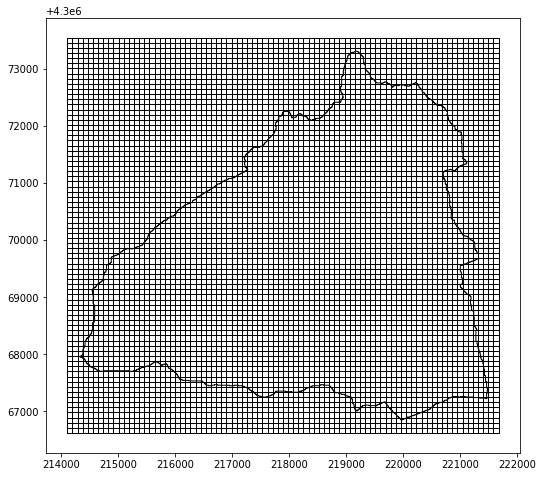

In [9]:
# Plot model grid and model boundary
fig, ax = plt.subplots(figsize=(20,8))
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\hru_params.shp"
boundary=geopandas.read_file(fn1)
grid=geopandas.read_file(fn2)
grid.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
plt.show()